# MNIST

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

import tensorflow as tf

In [4]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9939917037916155835
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 16139419648
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17898282707427218610
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
 xla_global_id: 416903419]

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [41]:
X_train = X_train.reshape(-1, 28, 28, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 28, 28, 1)
y_test = y_test.reshape(-1, 1)

In [29]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

enc.fit(y_train)

y_train_onehot = np.array(enc.transform(y_train).toarray(), dtype='float32')
y_test_onehot = np.array(enc.transform(y_test).toarray(), dtype='float32')

In [42]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), strides=1, input_shape=(28, 28, 1), activation='relu', padding='SAME'))
model.add(Conv2D(64, kernel_size=(3, 3), strides=1, activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, strides=1, padding='SAME'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               25690624  
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [44]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [45]:
with tf.device("/device:GPU:0"):
    history = model.fit(X_train, y_train_onehot, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 7s 11ms/step - loss: 7.2875 - acc: 0.9320
Epoch 2/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0518 - acc: 0.9837
Epoch 3/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0332 - acc: 0.9894
Epoch 4/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0240 - acc: 0.9923
Epoch 5/5
600/600 [==============================] - 7s 11ms/step - loss: 0.0238 - acc: 0.9928


In [50]:
pred = model.predict(X_test)
pred = np.argmax(pred, 1)
np.mean(y_test.reshape(-1) == pred)

0.9791

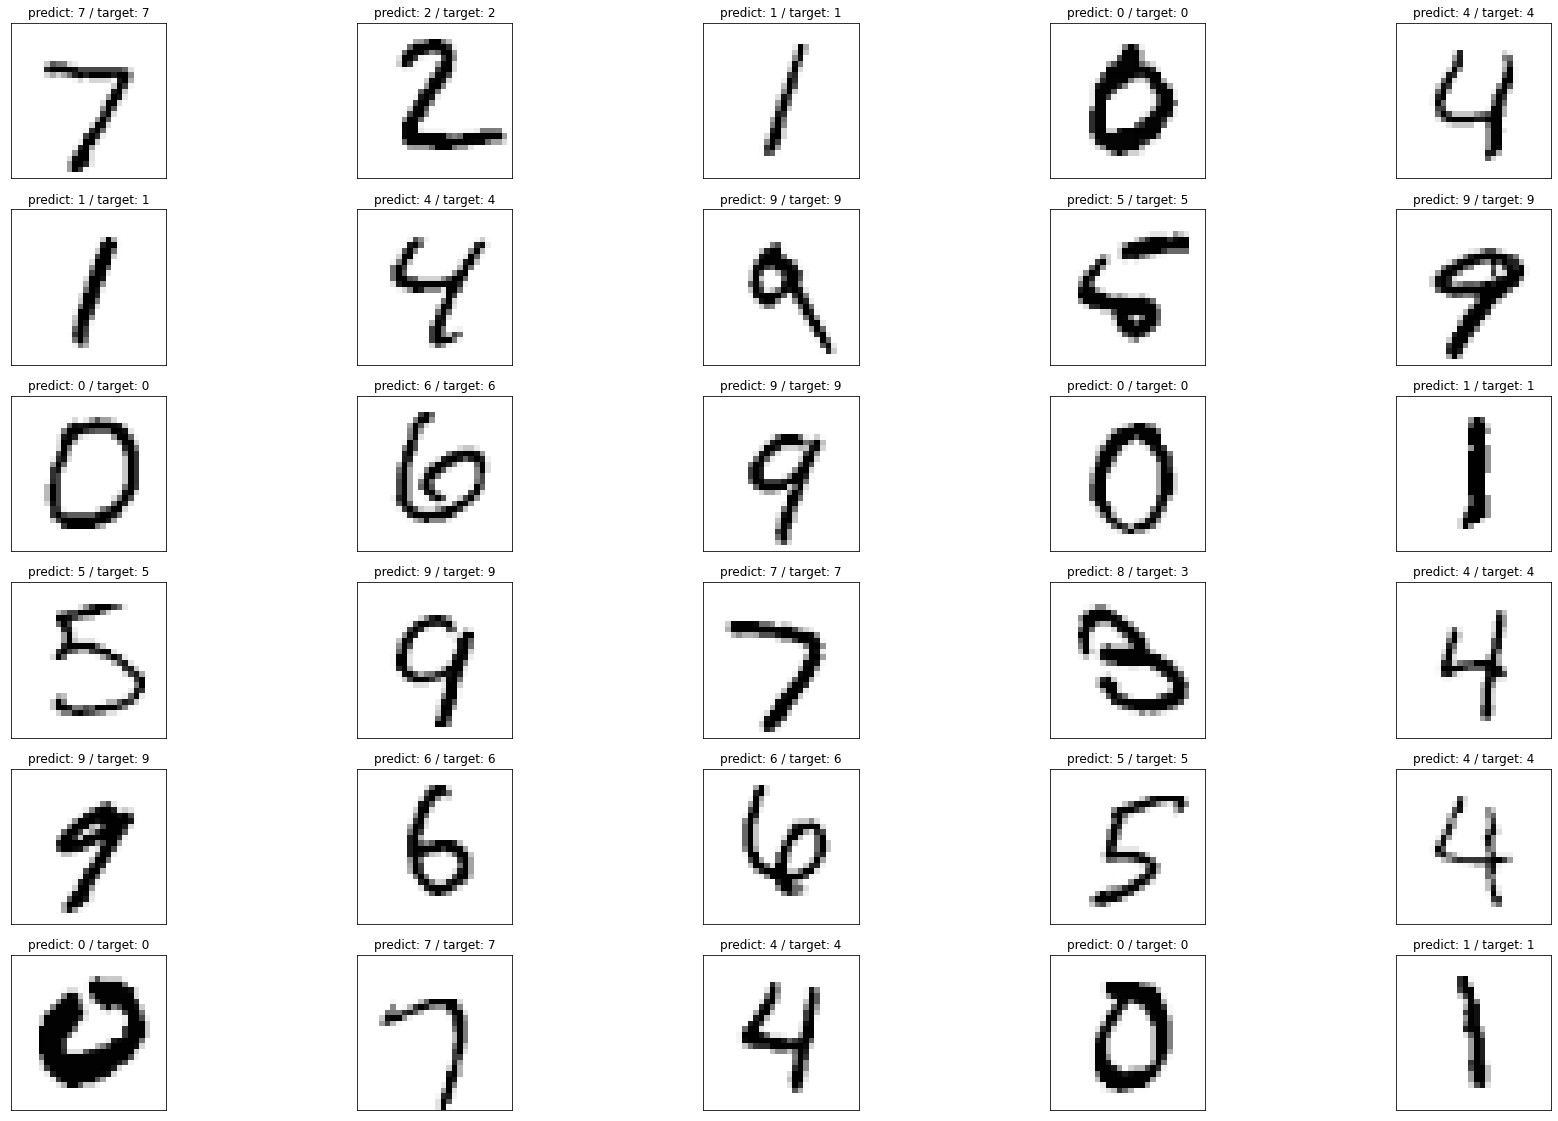

In [53]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 20))
for i in range(30):
    subplot = fig.add_subplot(6, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(f'predict: {pred[i]} / target: {y_test[i][0]}')
    subplot.imshow(X_test[i].reshape(28, 28), cmap='Greys')

# Dental Image

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array
import tensorflow as tf

In [2]:
TRAIN_DIR = \
    '/content/drive/MyDrive/Colab Notebooks/DSBA/dental_image/train/'

TEST_DIR = \
    '/content/drive/MyDrive/Colab Notebooks/DSBA/dental_image/test/'

In [3]:
IM_WIDTH = 224
IM_HEIGHT = 224

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range = 180,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1/255.0
)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size = 50,
    class_mode = 'categorical',
    shuffle = True)

Found 150 images belonging to 3 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size = (IM_WIDTH, IM_HEIGHT),
    batch_size = 60,
    class_mode = 'categorical',
    shuffle = False
)

Found 60 images belonging to 3 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(224, 224, 3), activation='relu', padding='SAME'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='SAME'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 802816)            0         
                                                                 
 dense_2 (Dense)             (None, 512)               411042304 
                                                                 
 dense_3 (Dense)             (None, 3)                 1539      
                                                      

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
with tf.device("/device:GPU:0"):
    history = model.fit(train_generator, epochs=100, validation_data=test_generator)

Epoch 1/100
3/3 [==============================] - 33s 15s/step - loss: 8.8121 - acc: 0.3133 - val_loss: 5.9449 - val_acc: 0.3333
Epoch 2/100
3/3 [==============================] - 3s 971ms/step - loss: 7.4829 - acc: 0.4067 - val_loss: 3.9210 - val_acc: 0.3333
Epoch 3/100
3/3 [==============================] - 3s 968ms/step - loss: 2.9330 - acc: 0.3400 - val_loss: 3.7897 - val_acc: 0.5167
Epoch 4/100
3/3 [==============================] - 3s 939ms/step - loss: 3.3305 - acc: 0.4600 - val_loss: 3.1110 - val_acc: 0.5000
Epoch 5/100
3/3 [==============================] - 3s 990ms/step - loss: 1.9129 - acc: 0.4533 - val_loss: 1.2778 - val_acc: 0.3667
Epoch 6/100
3/3 [==============================] - 3s 967ms/step - loss: 1.7600 - acc: 0.3733 - val_loss: 1.3740 - val_acc: 0.3500
Epoch 7/100
3/3 [==============================] - 3s 977ms/step - loss: 1.2075 - acc: 0.4533 - val_loss: 1.9009 - val_acc: 0.3500
Epoch 8/100
3/3 [==============================] - 3s 970ms/step - loss: 1.4426 - ac

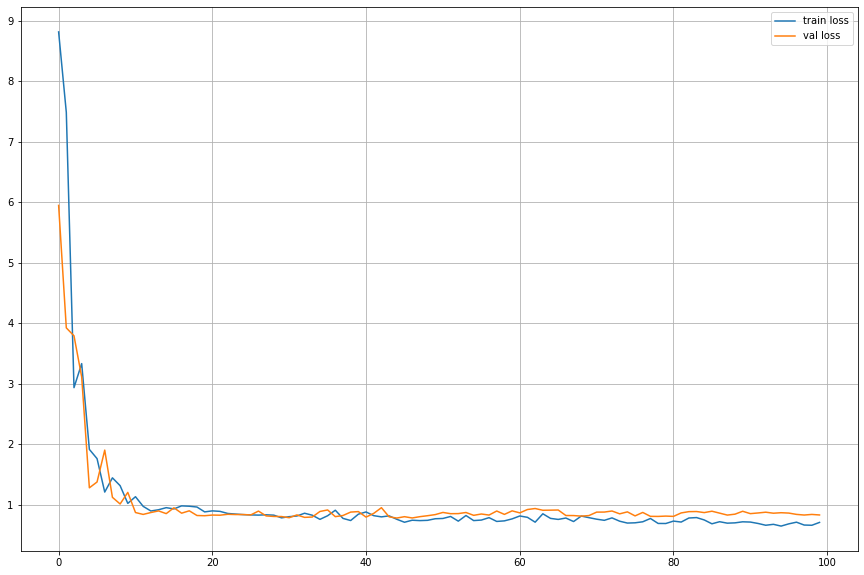

In [18]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend(); plt.grid()

# 실습(CIFAR-10)

In [25]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [26]:
scaler = StandardScaler()

scaler.fit(X_train.reshape(-1, 32*32*3))

scaled_X_train = scaler.transform(X_train.reshape(-1, 32*32*3)).reshape(-1, 32, 32, 3)
scaled_X_test = scaler.transform(X_test.reshape(-1, 32*32*3)).reshape(-1, 32, 32, 3)

In [3]:
enc = OneHotEncoder()

enc.fit(y_train)

y_train_onehot = np.array(enc.transform(y_train).toarray(), dtype='float32')
y_test_onehot = np.array(enc.transform(y_test).toarray(), dtype='float32')

In [8]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='SAME'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='SAME'))
model.add(MaxPooling2D(pool_size=2, padding='SAME'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dropout (Dropout)           (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               8389120   
                                                      

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

with tf.device("/device:GPU:0"):
    history = model.fit(scaled_X_train, y_train_onehot, epochs=200, batch_size=500, validation_data=(scaled_X_test, y_test_onehot), callbacks=[callback])

Epoch 1/200
500/500 [==============================] - 6s 10ms/step - loss: 1.4593 - acc: 0.4852 - val_loss: 1.2198 - val_acc: 0.5669
Epoch 2/200
500/500 [==============================] - 5s 9ms/step - loss: 1.1344 - acc: 0.6033 - val_loss: 1.0680 - val_acc: 0.6255
Epoch 3/200
500/500 [==============================] - 5s 9ms/step - loss: 0.9889 - acc: 0.6571 - val_loss: 0.9993 - val_acc: 0.6463
Epoch 4/200
500/500 [==============================] - 5s 9ms/step - loss: 0.8753 - acc: 0.6977 - val_loss: 0.9468 - val_acc: 0.6680
Epoch 5/200
500/500 [==============================] - 5s 9ms/step - loss: 0.7809 - acc: 0.7315 - val_loss: 0.9244 - val_acc: 0.6785
Epoch 6/200
500/500 [==============================] - 5s 9ms/step - loss: 0.7014 - acc: 0.7598 - val_loss: 0.8891 - val_acc: 0.6935
Epoch 7/200
500/500 [==============================] - 5s 9ms/step - loss: 0.6270 - acc: 0.7871 - val_loss: 0.8645 - val_acc: 0.7024
Epoch 8/200
500/500 [==============================] - 5s 9ms/step -

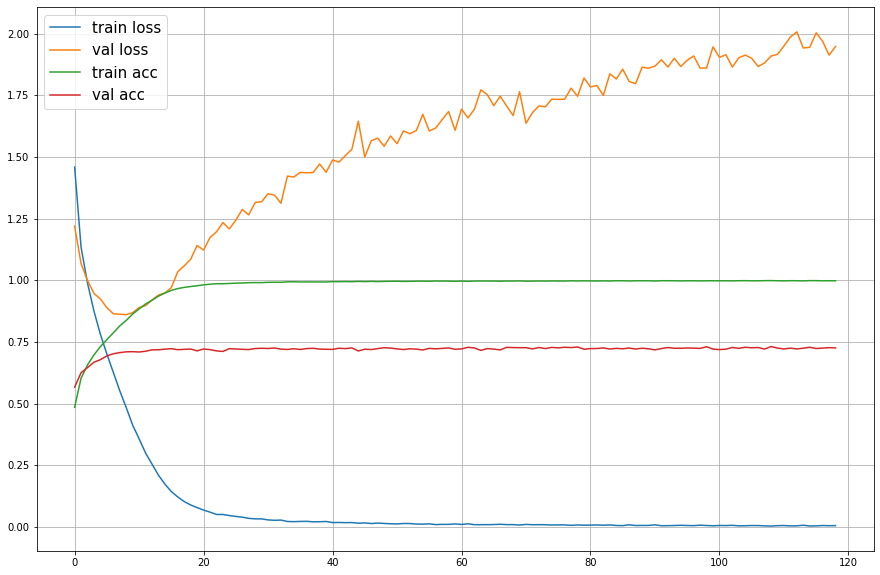

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.plot(history.history['acc'], label = 'train acc')
plt.plot(history.history['val_acc'], label = 'val acc')
plt.legend(prop={'size':15}); plt.grid()
# plt.ylim(0, 1.0)

In [15]:
label = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']

In [27]:
pred = model.predict(scaled_X_test)
pred = np.argmax(pred, 1)

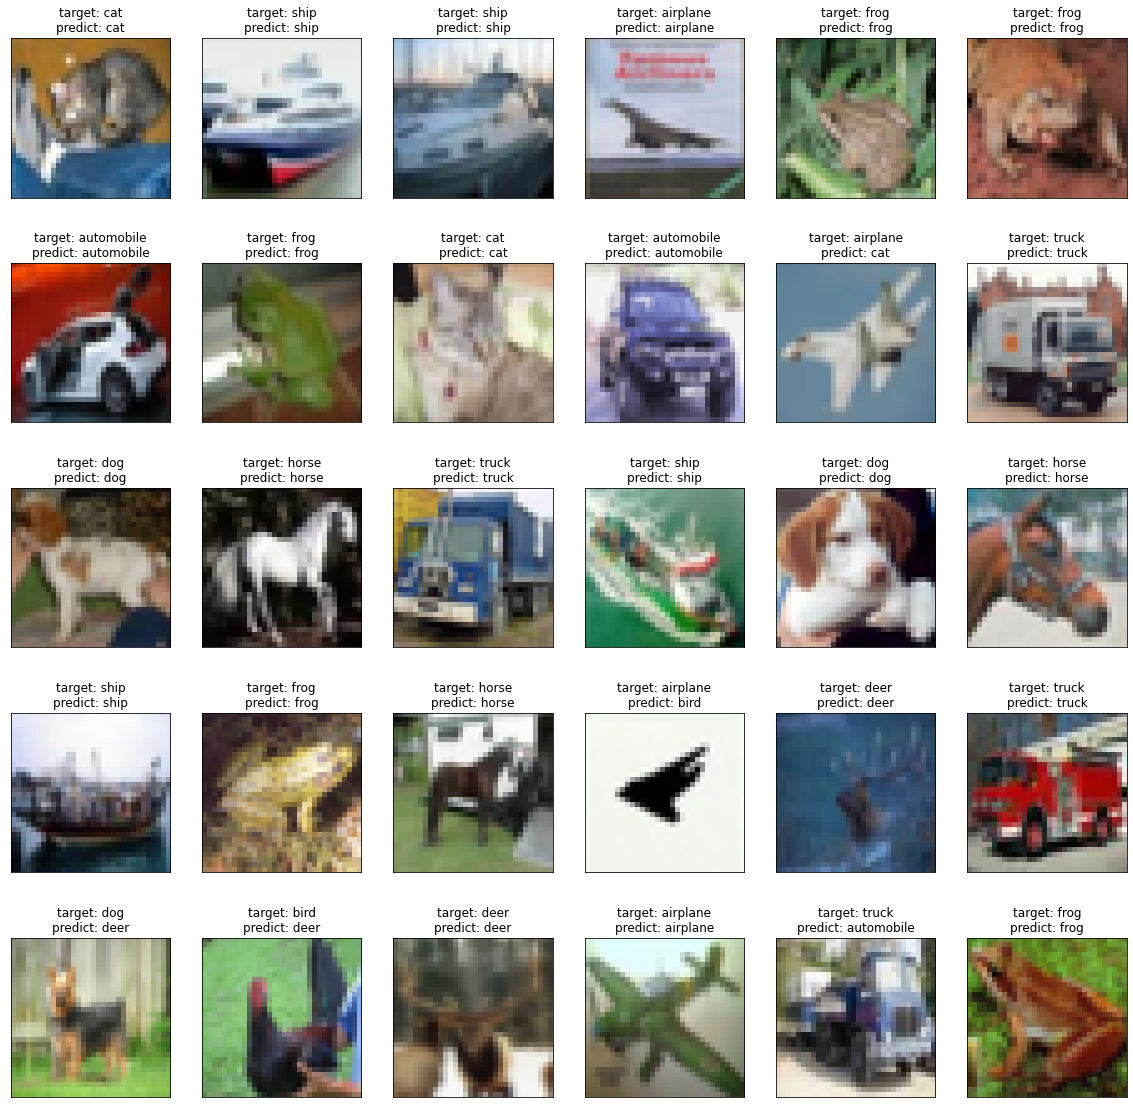

In [35]:
fig = plt.figure(figsize=(20, 20))
for i in range(30):
    subplot = fig.add_subplot(5, 6, i+1)

    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(f'target: {label[y_test[i][0]]}\npredict: {label[pred[i]]}')
    subplot.imshow(X_test[i].reshape(32, 32, 3))